**Author:** [Tayyib Ul Hassan](https://github.com/tayyibgondal)

**Dated:** Nov 2, 2024


In [2]:
!pip install swig
!pip install "gymnasium[all]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 14.5 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376132 sha256=a36f9471518c2930e0e2d4f96e1ea3df685542025bf1556e3a87ceda2703c4b4
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce

In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

## The following code works for discrete environments. General implementation of sarsa(0).

In [4]:
import numpy as np

def get_action(s, policy):
    # Choose an action based on the current policy (e.g., epsilon-greedy)
    return np.random.choice(len(policy[s]), p=policy[s])

def sarsa_zero(env, epsilon, episodes, alpha, gamma=1.0):
    # Initialize Q(s, a) to zeros
    q = np.zeros((env.observation_space.n, env.action_space.n))
    policy = np.full((env.observation_space.n, env.action_space.n), epsilon / env.action_space.n)

    for episode_num in range(episodes):
        # Start with state s
        s, info = env.reset()
        action = get_action(s, policy)
        terminated = False

        while not terminated:
            # Take action and observe next state and reward
            s_next, reward, terminated, truncated, info = env.step(action)
            action_next = get_action(s_next, policy)  # Next action from policy at s_next

            # SARSA(0) update
            q[s, action] += alpha * (reward + gamma * q[s_next, action_next] - q[s, action])

            # Update the policy for the current state
            best_action = np.argmax(q[s])
            for a in range(env.action_space.n):
                policy[s, a] = epsilon / env.action_space.n
                if a == best_action:
                    policy[s, a] += (1 - epsilon)

            # Move to the next state and action
            s, action = s_next, action_next

    return q, policy


## Sarsa(0) for cartpole environment
3 changes were made.

  1) Discretize environment (Create bins for possible state values)

  2) Digitize each of the newly sampled states

  3) get_action() function changes a bit.

Episode 1000: Total Reward: 27.0
Episode 2000: Total Reward: 57.0
Episode 3000: Total Reward: 21.0
Episode 4000: Total Reward: 37.0
Episode 5000: Total Reward: 28.0
Episode 6000: Total Reward: 67.0
Episode 7000: Total Reward: 38.0
Episode 8000: Total Reward: 12.0
Episode 9000: Total Reward: 40.0
Episode 10000: Total Reward: 35.0
Episode 11000: Total Reward: 37.0
Episode 12000: Total Reward: 53.0
Episode 13000: Total Reward: 48.0
Episode 14000: Total Reward: 33.0
Episode 15000: Total Reward: 48.0
Episode 16000: Total Reward: 15.0
Episode 17000: Total Reward: 10.0
Episode 18000: Total Reward: 11.0
Episode 19000: Total Reward: 70.0
Episode 20000: Total Reward: 13.0


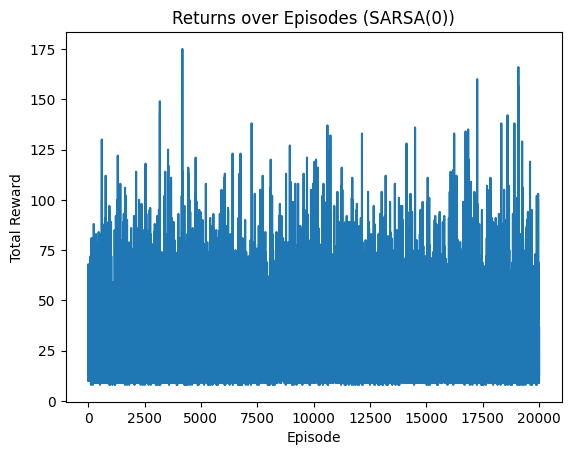

In [16]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Create bins for each dimension of the state space
def create_bins(env, num_bins=10):
    bins = []
    for i in range(env.observation_space.shape[0]):
        low = env.observation_space.low[i]
        high = env.observation_space.high[i]
        bins.append(np.linspace(low, high, num_bins - 1))
    return bins

# Function to discretize state space
def discretize_state(state, bins):
    state_idx = tuple(
        min(len(bins[i]) - 1, max(0, np.digitize(state[i], bins[i]) - 1)) for i in range(len(state))
    )
    return state_idx

# Epsilon-greedy action selection
def get_action(state_idx, q_table, num_actions, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(num_actions)  # Random action (exploration)
    else:
        return np.argmax(q_table[state_idx])  # Greedy action (exploitation)

# SARSA(0) algorithm
def sarsa_zero_cartpole(env, num_bins=10, num_episodes=20000, alpha=0.1, gamma=0.95):
    bins = create_bins(env, num_bins)
    num_actions = env.action_space.n

    # Initialize Q-table
    q_table = np.zeros([num_bins] * env.observation_space.shape[0] + [num_actions])

    returns = []  # Track returns for each episode

    for episode in range(num_episodes):
        # Set epsilon to 1 for the first 100 episodes, then switch to 0.2
        epsilon = 1 if episode < 100 else 0.2

        state, _ = env.reset()
        state_idx = discretize_state(state, bins)
        action = get_action(state_idx, q_table, num_actions, epsilon)

        total_reward = 0
        terminated = False

        while not terminated:
            next_state, reward, terminated, truncated, _ = env.step(action)
            next_state_idx = discretize_state(next_state, bins)
            next_action = get_action(next_state_idx, q_table, num_actions, epsilon)

            # SARSA(0) update
            q_table[state_idx][action] += alpha * (reward + gamma * q_table[next_state_idx][next_action] - q_table[state_idx][action])

            state_idx, action = next_state_idx, next_action
            total_reward += reward

        returns.append(total_reward)

        # Print progress every 1000 episodes
        if (episode + 1) % 1000 == 0:
            print(f"Episode {episode + 1}: Total Reward: {total_reward}")

    return q_table, returns

# Plotting function
def plot_returns(returns):
    plt.plot(returns)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Returns over Episodes (SARSA(0))')
    plt.show()

# Main code
env = gym.make('CartPole-v1')

num_episodes=20000
alpha=0.1
gamma=0.95
later_epsilon = 0.2

q_table, returns = sarsa_zero_cartpole(env)

plot_returns(returns)


## Sarsa(0) algorithm for Acrobate environment

Episode 1000: Total Reward: -441.0
Episode 2000: Total Reward: -214.0
Episode 3000: Total Reward: -638.0
Episode 4000: Total Reward: -318.0
Episode 5000: Total Reward: -363.0
Episode 6000: Total Reward: -310.0
Episode 7000: Total Reward: -325.0
Episode 8000: Total Reward: -271.0
Episode 9000: Total Reward: -283.0
Episode 10000: Total Reward: -513.0
Episode 11000: Total Reward: -387.0
Episode 12000: Total Reward: -152.0
Episode 13000: Total Reward: -318.0
Episode 14000: Total Reward: -249.0
Episode 15000: Total Reward: -347.0
Episode 16000: Total Reward: -293.0
Episode 17000: Total Reward: -202.0
Episode 18000: Total Reward: -248.0
Episode 19000: Total Reward: -533.0
Episode 20000: Total Reward: -564.0


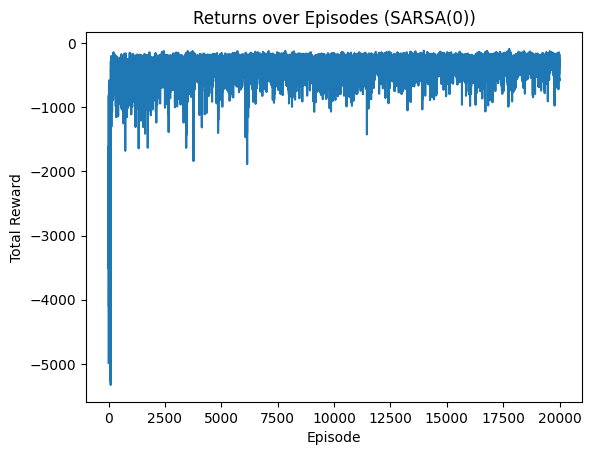

In [17]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Create bins for each dimension of the state space
def create_bins(env, num_bins=10):
    bins = []
    for i in range(env.observation_space.shape[0]):
        low = env.observation_space.low[i]
        high = env.observation_space.high[i]
        bins.append(np.linspace(low, high, num_bins - 1))
    return bins

# Function to discretize state space
def discretize_state(state, bins):
    state_idx = tuple(
        min(len(bins[i]) - 1, max(0, np.digitize(state[i], bins[i]) - 1)) for i in range(len(state))
    )
    return state_idx

# Epsilon-greedy action selection
def get_action(state_idx, q_table, num_actions, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(num_actions)  # Random action (exploration)
    else:
        return np.argmax(q_table[state_idx])  # Greedy action (exploitation)

# SARSA(0) algorithm
def sarsa_zero_acrobot(env, num_bins=10, num_episodes=20000, alpha=0.1, gamma=0.95):
    bins = create_bins(env, num_bins)
    num_actions = env.action_space.n

    # Initialize Q-table
    q_table = np.zeros([num_bins] * env.observation_space.shape[0] + [num_actions])

    returns = []  # Track returns for each episode

    for episode in range(num_episodes):
        # Set epsilon to 1 for the first 100 episodes, then switch to 0.2
        epsilon = 1 if episode < 100 else 0.2

        state, _ = env.reset()
        state_idx = discretize_state(state, bins)
        action = get_action(state_idx, q_table, num_actions, epsilon)

        total_reward = 0
        terminated = False

        while not terminated:
            next_state, reward, terminated, truncated, _ = env.step(action)
            next_state_idx = discretize_state(next_state, bins)
            next_action = get_action(next_state_idx, q_table, num_actions, epsilon)

            # SARSA(0) update
            q_table[state_idx][action] += alpha * (reward + gamma * q_table[next_state_idx][next_action] - q_table[state_idx][action])

            state_idx, action = next_state_idx, next_action
            total_reward += reward

        returns.append(total_reward)

        # Print progress every 1000 episodes
        if (episode + 1) % 1000 == 0:
            print(f"Episode {episode + 1}: Total Reward: {total_reward}")

    return q_table, returns

# Plotting function
def plot_returns(returns):
    plt.plot(returns)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Returns over Episodes (SARSA(0))')
    plt.show()

# Main code
env = gym.make('Acrobot-v1')

num_episodes=20000
alpha=0.1
gamma=0.95
later_epsilon = 0.2

q_table, returns = sarsa_zero_acrobot(env)

plot_returns(returns)
